In [2]:
import numpy as np
import pandas as pd

In [6]:
df =pd.read_csv('email_spam.csv')

In [8]:
df.sample(15)


,Category,Message
1046,ham,"Come round, it's ."
2666,ham,R u meeting da ge at nite tmr?
3067,spam,Get a brand new mobile phone by being an agent...
109,ham,I know! Grumpy old people. My mom was like you...
3541,ham,"I'll get there at 3, unless you guys want me t..."
3260,spam,Congratulations! Thanks to a good friend U hav...
3762,ham,Was just about to ask. Will keep this one. May...
1166,ham,"Haha yeah I see that now, be there in a sec"
6,ham,Even my brother is not like to speak with me. ...
2518,ham,"Sorry, I'll call later"


In [12]:
df.shape

(5572, 2)

DATA CLEANING

In [27]:
# checking if there any null values in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [19]:
# dataset dosen't have any null values, so no need of dropping

In [39]:
#applying labelEncoder ( to change ham/spam to 0/1 respectively)
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()


In [56]:
encode.fit_transform(df['Category'])

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
df['Category'] = encode.fit_transform(df['Category'])

In [66]:
df.head()

,Category,Message,category
0,0,"Go until jurong point, crazy.. Available only ...",0
1,0,Ok lar... Joking wif u oni...,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,0,U dun say so early hor... U c already then say...,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0


In [68]:
#checking missing values
df.isnull().sum()

Category    0
Message     0
category    0
dtype: int64

In [70]:
# checking duplicate values
df.duplicated().sum()

415

In [72]:
# removing duplicates
df= df.drop_duplicates(keep='first')

In [74]:
df.duplicated().sum()

0

In [78]:
df.shape

(5157, 3)

EXPLORARTORY DATA ANALYSIS (EDA)

In [81]:
df.head()

,Category,Message,category
0,0,"Go until jurong point, crazy.. Available only ...",0
1,0,Ok lar... Joking wif u oni...,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,0,U dun say so early hor... U c already then say...,0
4,0,"Nah I don't think he goes to usf, he lives aro...",0


In [83]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

In [85]:
# to represt ham and spam in our datasets betterly we are representing it in form of pi charts

([<matplotlib.patches.Wedge at 0x27e50d5d310>,
 [Text(-1.017194586770333, 0.41870654717251754, 'ham'),
  Text(1.0171945769697988, -0.41870657098167496, 'spam')],
 [Text(-0.5548334109656361, 0.22838538936682773, '87.6'),
  Text(0.5548334056198901, -0.22838540235364085, '12.4')])

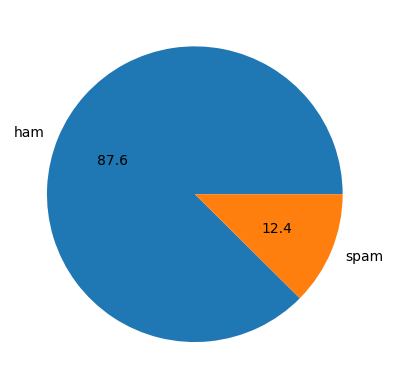

In [107]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.1f") 

In [91]:
## data is imbalanced (there is more ham and very less spam) ##

In [93]:
import nltk

In [95]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [159]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\akshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [234]:
# no_characters        :  length of each message in terms of no. of characters
df['no_characters'] = df['Message'].apply(len)

In [265]:
df.head()


,Category,Message,category,no_characters,no_words,no_sentence
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,0,Ok lar... Joking wif u oni...,0,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,0,U dun say so early hor... U c already then say...,0,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [238]:
# n0_words   : we use (nltk word_tokenization function) to break the message into words)
df['no_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [257]:
df.head()

,Category,Message,category,no_characters,no_words,no_sentence
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,0,Ok lar... Joking wif u oni...,0,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,0,U dun say so early hor... U c already then say...,0,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [261]:
# no_sentence   : sent_tokenize function breaks messages into parts of sentences.
df['no_sentence'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [263]:
df.head()

,Category,Message,category,no_characters,no_words,no_sentence
0,0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,0,Ok lar... Joking wif u oni...,0,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,0,U dun say so early hor... U c already then say...,0,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [269]:
df[['no_characters','no_words','no_sentence']].describe()

,no_characters,no_words,no_sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [273]:
#using this describe function we can seperate spam and ham emails
# for spam (1)
df[df['Category'] ==1][['no_characters','no_words','no_sentence']].describe()

,no_characters,no_words,no_sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [281]:
# for_ham (0)    ( spam messages have more no of characters/words/sentences than ham)
df[df['Category'] ==0][['no_characters','no_words','no_sentence']].describe()

,no_characters,no_words,no_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [296]:
# showing the difference in characters in spam and ham through histogram plots
import seaborn as sns

C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\akshi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='no_characters', ylabel='Count'>

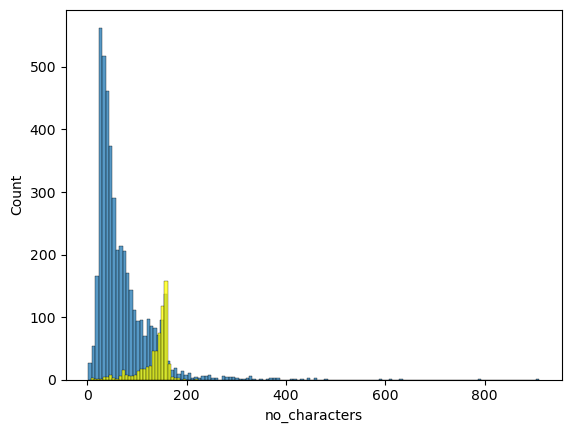

In [298]:
sns.histplot(df[df['Category']==0]['no_characters'])
sns.histplot(df[df['Category']==1]['no_characters'],color='yellow')




# data preprocessing

In [563]:
# lower case
def transform_Message(Message):
    Message = Message.lower()
   #tokenisation
    Message = nltk.word_tokenize(Message)

    # now text is a list, so we run a loop
    y=[]
    
    for i in Message:
        if i.isalnum():  # if i is alphanumeric it gets appended
            y.append(i)
     #removal of stopwords and punctuations
    Message = y[:]  # Use y here, which contains alphanumeric words
    y.clear()
    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            #lemmatization 
    text = y[:]  # Make a copy of y before clearing it for stemming
    y.clear()
    for i in text:  # Use text, not Message here
        y.append(ps.stem(i))
         
    return " ".join(y)




In [565]:
transform_Message('I am working on NLP project on Emails ....%')

'work nlp project email'

In [567]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [569]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('hiding')


'hide'

In [588]:
df['Message'][244]

"Although i told u dat i'm into baig face watches now but i really like e watch u gave cos it's fr u. Thanx 4 everything dat u've done today, i'm touched..."

In [590]:
transform_Message("Although i told u dat i'm into baig face watches now but i really like e watch u gave cos it's fr u. Thanx 4 everything dat u've done today, i'm touched...")

'although told u dat baig face watch realli like e watch u gave co fr thanx 4 everyth dat u done today touch'

In [601]:
df['transformed_Message'] =df['Message'].apply(transform_Message)

In [603]:
df.sample(10)

,Category,Message,category,no_characters,no_words,no_sentence,transformed_Message
383,0,Hey leave it. not a big deal:-) take care.,0,42,14,2,hey leav big deal take care
1028,0,Are you not around or just still asleep? :V,0,43,11,2,around still asleep v
3729,0,The search 4 happiness is 1 of d main sources ...,0,137,30,3,search 4 happi 1 main sourc unhappi accept lif...
241,0,Tomarrow final hearing on my laptop case so i ...,0,51,11,1,tomarrow final hear laptop case cant
1868,0,Mmmm ... Fuck ... Not fair ! You know my weakn...,0,183,46,4,mmmm fuck fair know weak grin push knee expos ...
1756,0,Really good:)dhanush rocks once again:),0,39,10,1,realli good dhanush rock
2229,0,Those were my exact intentions,0,30,5,1,exact intent
226,0,Would really appreciate if you call me. Just n...,0,69,15,2,would realli appreci call need someon talk
1411,0,Pls speak to that customer machan.,0,34,7,1,pl speak custom machan
2465,0,They will pick up and drop in car.so no problem..,0,49,11,1,pick drop problem
